In [ ]:
#Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/WHR-2024-5CS037.csv')


In [ ]:
#Task1-1 Dataset Overview
#a
print("The first 10 rows are:")
print(df.head(10))

#b
print("\nDataset Dimensions:")
print(f"Number of Rows are: {df.shape[0]}")
print(f"Number of Columns are: {df.shape[1]}")

#c
print("\nColumns and Data Types:")
print(df.dtypes)

The first 10 rows are:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                

In [ ]:
#Task1.2 Basic Statistics

#a
print("Score Statistics:")
print(f"Mean Score is: {df['score'].mean():.2f}")
print(f"Median Score is: {df['score'].median():.2f}")
print(f"Standard Deviation of Score is: {df['score'].std():.2f}")

#b
print("\nHighest and Lowest Happiness Scores:")
print(f"Highest Score is: {df.loc[df['score'].idxmax(), 'Country name']} ({df['score'].max():.2f})")
print(f"Lowest Score is: {df.loc[df['score'].idxmin(), 'Country name']} ({df['score'].min():.2f})")

Score Statistics:
Mean Score is: 5.53
Median Score is: 5.79
Standard Deviation of Score is: 1.17

Highest and Lowest Happiness Scores:
Highest Score is: Finland (7.74)
Lowest Score is: Afghanistan (1.72)


In [ ]:
#Task1.3 Missing Values
print("Missing Values are:")
print(df.isnull().sum())

Missing Values are:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#Task1.4 Filtering and Sorting
high_score_countries = df[df['score'] > 7.5]
print("Countries with Score more than 7.5 are:")
print(high_score_countries[['Country name', 'score']])

high_score_gdp_sorted = high_score_countries.sort_values('Log GDP per capita', ascending=False).head(10)
print("\nTop 10 High-Score Countries by GDP per Capita are:")
print(high_score_gdp_sorted[['Country name', 'score', 'Log GDP per capita']])

Countries with Score more than 7.5 are:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525

Top 10 High-Score Countries by GDP per Capita are:
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


In [ ]:
#Task1.5 Adding New Columns
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(happiness_category)

# This adds a new column 'Happiness Category'
df.to_csv('/content/drive/MyDrive/Concept and Technologies of AI/WHR-2024-5CS037.csv', index=False)
df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


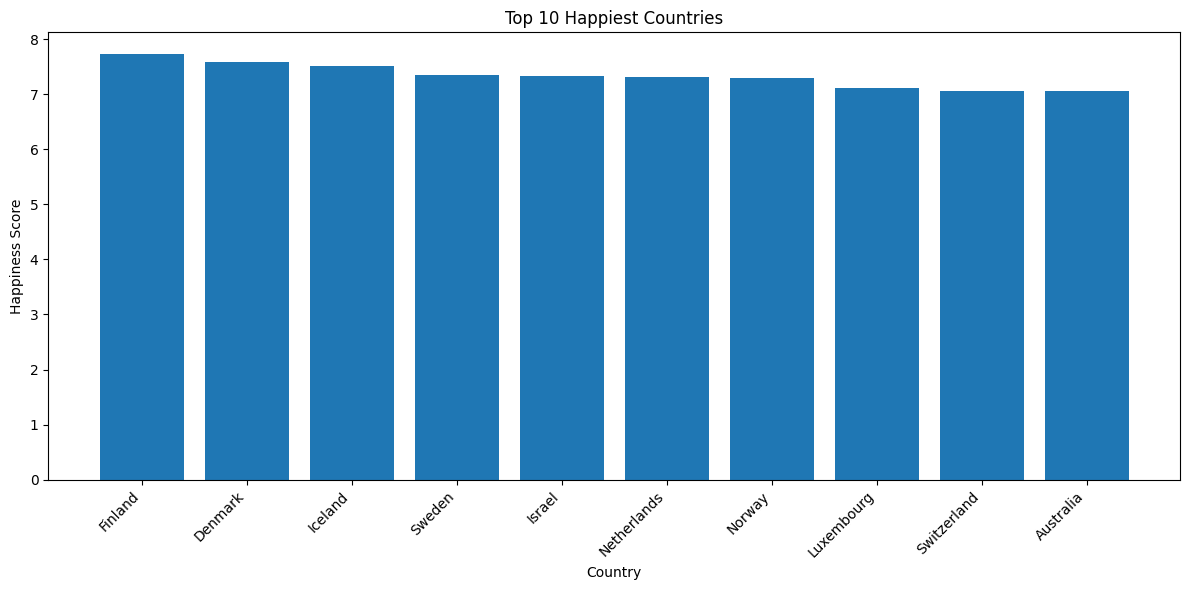

In [ ]:
#Task1.6 Data Visualizations

# Bar Plot:
plt.figure(figsize=(12, 6))
top_10_happiest = df.nlargest(10, 'score')
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'])
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()


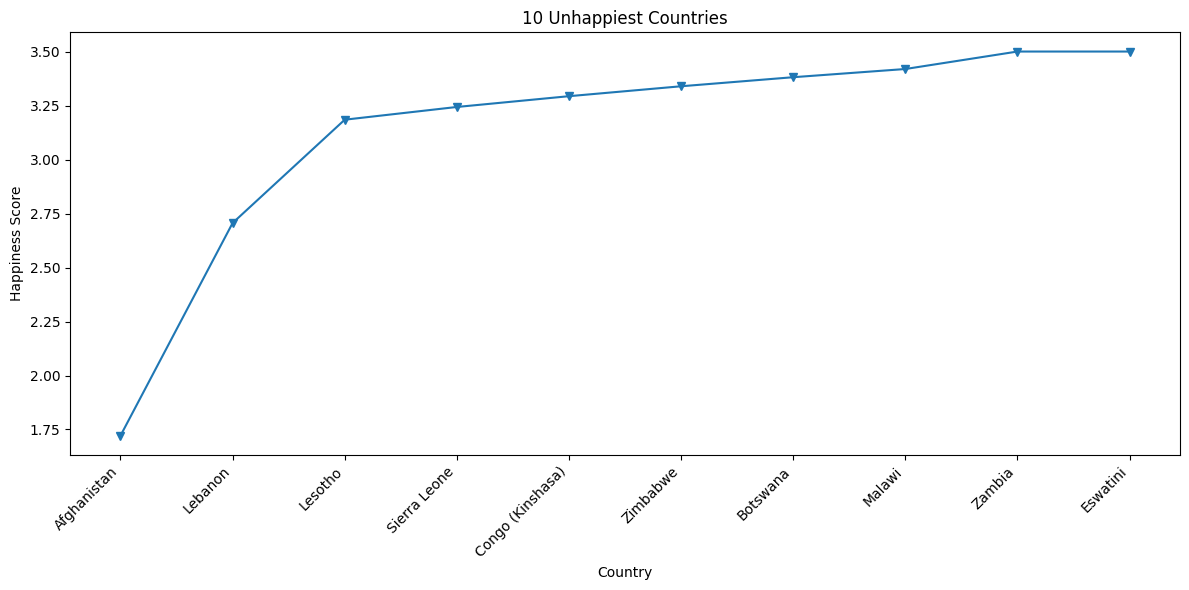

In [ ]:
#Line Plot:
plt.figure(figsize=(12, 6))
bottom_10_unhappiest = df.nsmallest(10, 'score')
plt.plot(bottom_10_unhappiest['Country name'], bottom_10_unhappiest['score'], marker='v')
plt.title('10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

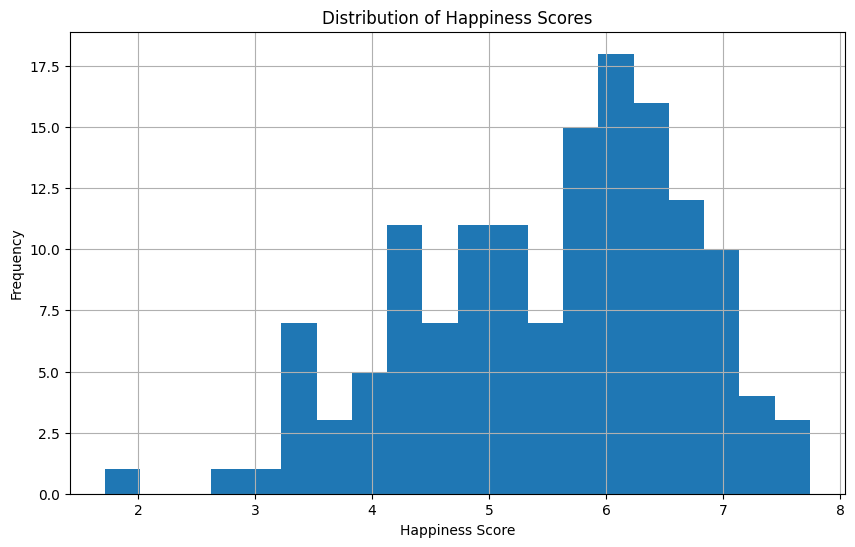

In [ ]:
#Histogram:
plt.figure(figsize=(10, 6))
df['score'].hist(bins=20)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()
plt.close()

Interpretation:

Score Range: While the ratings appear to range from around 2 to about 8, they really reflect the different degrees of happiness that exist in every nation.

Score Concentration: Many countries fall into the "High" Happiness Category, with scores ranging from 6 to 8. Few nations fall within the Low (less than 4) or Medium (between 4 and 6) levels.

Skewness: The distribution is left-skewed, meaning that a greater percentage of nations have higher scores, suggesting that most nations have generally happy populations.

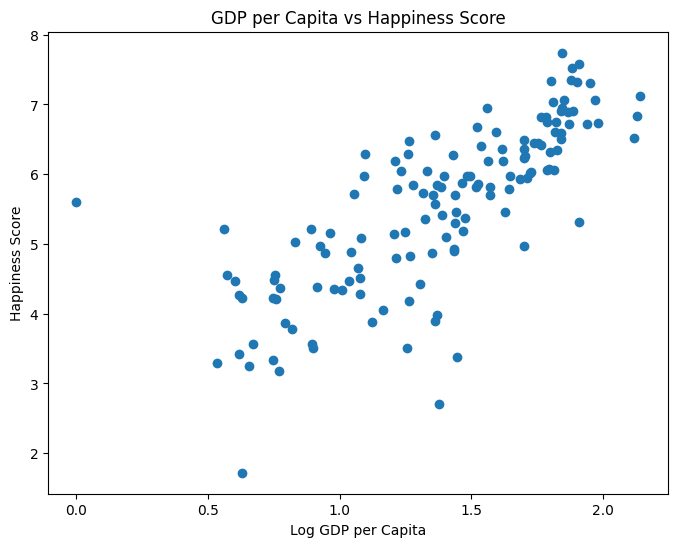

In [ ]:
#Scatter Plot:
plt.figure(figsize=(8, 6))
plt.scatter(df['Log GDP per capita'], df['score'])
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()
plt.close()

In [ ]:
#Problem - 2 - Some Advance Data Exploration Task:

#Task - 1 - Setup Task - Preparing the South-Asia Dataset:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the DataFrame to include only rows corresponding to the South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()

# Save the filtered DataFrame as a CSV file in Google Drive
south_asia_df.to_csv('/content/drive/MyDrive/Concept and Technologies of AI/south_asia_dataset.csv', index=False)



South Asia Composite Score Ranking:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


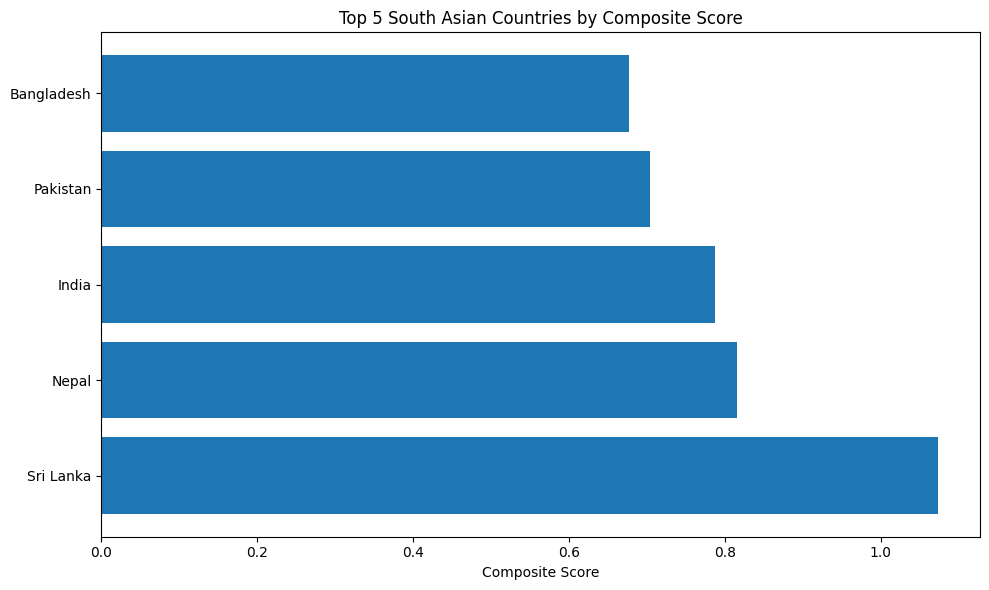

In [ ]:
#Task - 2 - Composite Score Ranking:

# Calculate the composite score for each country using weighted averages of selected indicators
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Rank South Asian countries based on their composite scores in descending order
south_asia_ranked = south_asia_df.sort_values('Composite Score', ascending=False)
print("\nSouth Asia Composite Score Ranking:")
print(south_asia_ranked[['Country name', 'Composite Score']])

# Visualize the top 5 South Asian countries by composite score using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(south_asia_ranked['Country name'][:5], south_asia_ranked['Composite Score'][:5])
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.tight_layout()
plt.show()
plt.close()


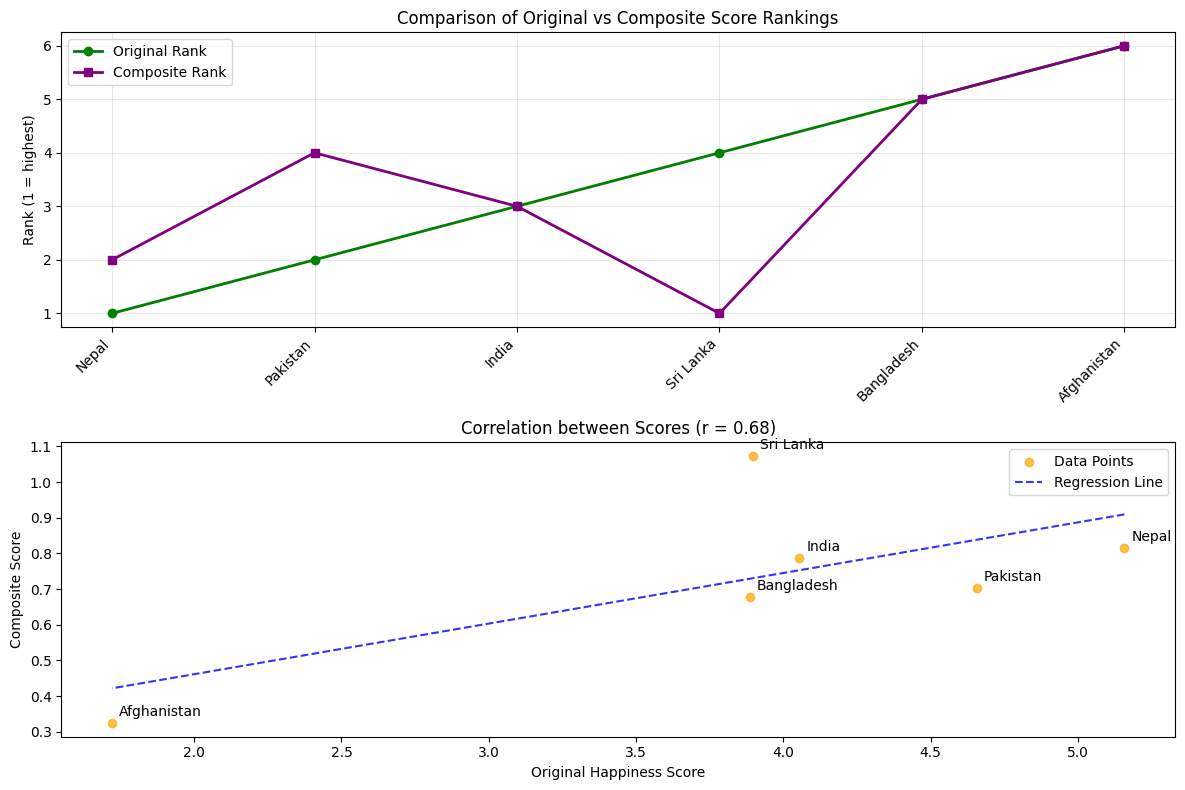


Comparison of Rankings:
    Country name  score  Composite Score  Original Rank  Composite Rank  \
92         Nepal  5.158            0.816            1.0             2.0   
107     Pakistan  4.657            0.704            2.0             4.0   
125        India  4.054            0.787            3.0             3.0   
127    Sri Lanka  3.898            1.074            4.0             1.0   
128   Bangladesh  3.886            0.677            5.0             5.0   
142  Afghanistan  1.721            0.324            6.0             6.0   

     Rank Difference  
92              -1.0  
107             -2.0  
125              0.0  
127              3.0  
128              0.0  
142              0.0  


<ipython-input-23-0e60c49934ed>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['Rank Difference'] = comparison_df['Original Rank'] - comparison_df['Composite Rank']


In [ ]:
#Task2 - Comparison of Original vs Composite Score Rankings
# Add rankings for both the original happiness score and the composite score
south_asia_df['Original Rank'] = south_asia_df['score'].rank(ascending=False)
south_asia_df['Composite Rank'] = south_asia_df['Composite Score'].rank(ascending=False)

# Calculate the correlation between the original happiness score and the composite score
score_correlation = south_asia_df['score'].corr(south_asia_df['Composite Score'])

# Create a comparison visualization
plt.figure(figsize=(12, 8))

# Subplot 1: Parallel rankings for original and composite scores
plt.subplot(2, 1, 1)
x = range(len(south_asia_df))
plt.plot(south_asia_df['Country name'], south_asia_df['Original Rank'], 'green', marker='o', label='Original Rank', linewidth=2)
plt.plot(south_asia_df['Country name'], south_asia_df['Composite Rank'], 'purple', marker='s', label='Composite Rank', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rank (1 = highest)')
plt.title('Comparison of Original vs Composite Score Rankings')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Scatter plot of original score vs composite score with a regression line
plt.subplot(2, 1, 2)
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'], color='orange', alpha=0.7, label='Data Points')
z = np.polyfit(south_asia_df['score'], south_asia_df['Composite Score'], 1)
p = np.poly1d(z)
plt.plot(south_asia_df['score'], p(south_asia_df['score']), "blue", linestyle="--", alpha=0.8, label='Regression Line')
plt.xlabel('Original Happiness Score')
plt.ylabel('Composite Score')
plt.title(f'Correlation between Scores (r = {score_correlation:.2f})')
plt.legend()

# Annotate country names on the scatter plot
for idx, row in south_asia_df.iterrows():
    plt.annotate(row['Country name'], (row['score'], row['Composite Score']),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
plt.close()

# Create a comparison table with additional rank difference column
comparison_df = south_asia_df[['Country name', 'score', 'Composite Score', 'Original Rank', 'Composite Rank']]
comparison_df['Rank Difference'] = comparison_df['Original Rank'] - comparison_df['Composite Rank']
comparison_df = comparison_df.sort_values('score', ascending=False)

# Display the comparison table with rankings and rank differences
print("\nComparison of Rankings:")
print(comparison_df.round(3))


Q1 Happiness Score: 3.8890000000000002
Q3 Happiness Score: 4.50625
IQR Happiness Score: 0.6172499999999994

Outliers based on Happiness Score:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


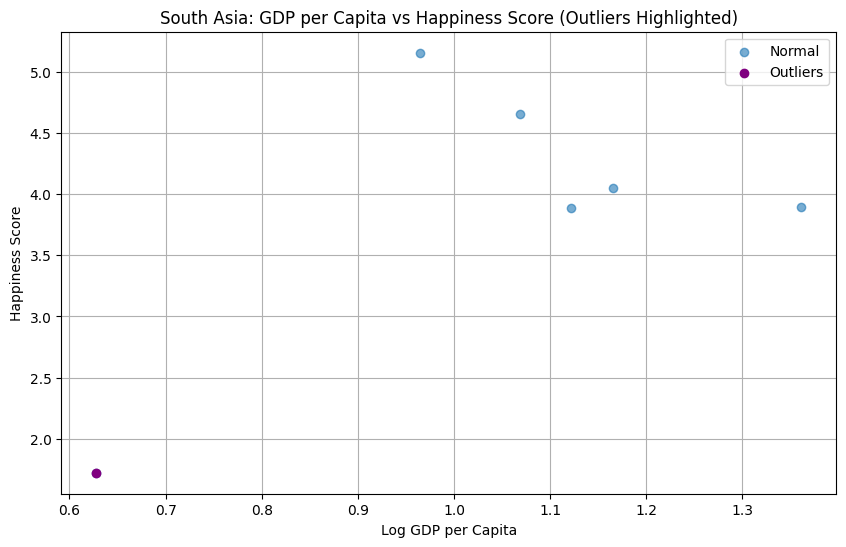

In [ ]:
# Task3 - Outlier Detection:

# Calculating Q1, Q3, and IQR for Happiness Scores
q1_happiness = south_asia_df['score'].quantile(0.25)
q3_happiness = south_asia_df['score'].quantile(0.75)
iqr_happiness = q3_happiness - q1_happiness

print(f"Q1 Happiness Score: {q1_happiness}")
print(f"Q3 Happiness Score: {q3_happiness}")
print(f"IQR Happiness Score: {iqr_happiness}")

# Identifying outliers based on happiness scores
happiness_outliers = south_asia_df[
    (south_asia_df['score'] < (q1_happiness - 1.5 * iqr_happiness)) |
    (south_asia_df['score'] > (q3_happiness + 1.5 * iqr_happiness))
]

print("\nOutliers based on Happiness Score:")
print(happiness_outliers[['Country name', 'score', 'Log GDP per capita']])

# Visualization of outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal', alpha=0.6)
plt.scatter(happiness_outliers['Log GDP per capita'], happiness_outliers['score'], color='purple', label='Outliers')
plt.title('South Asia: GDP per Capita vs Happiness Score (Outliers Highlighted)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()



Correlation between Score and Freedom to make life choices: 0.80


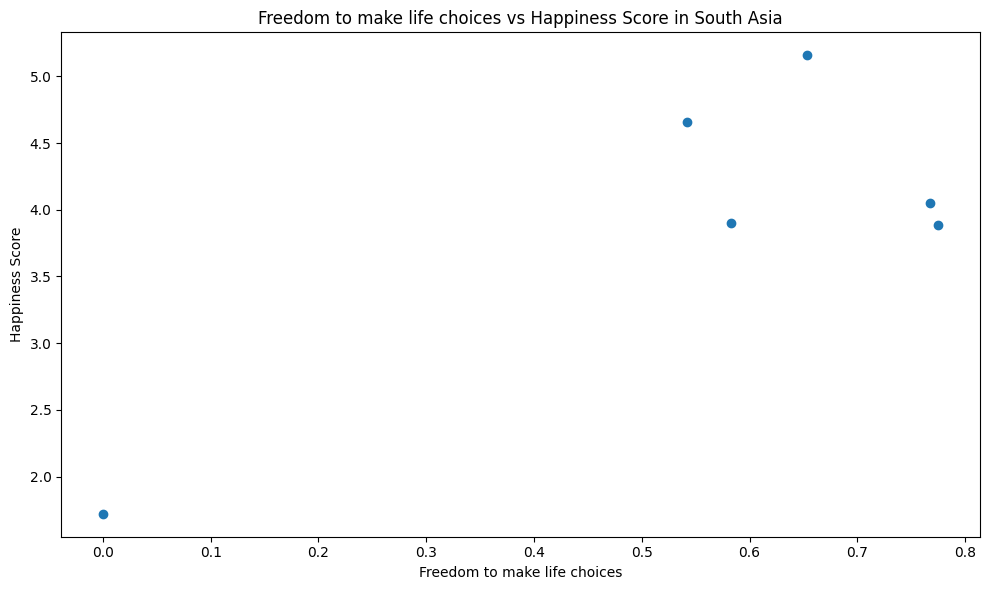


Correlation between Score and Generosity: 0.87


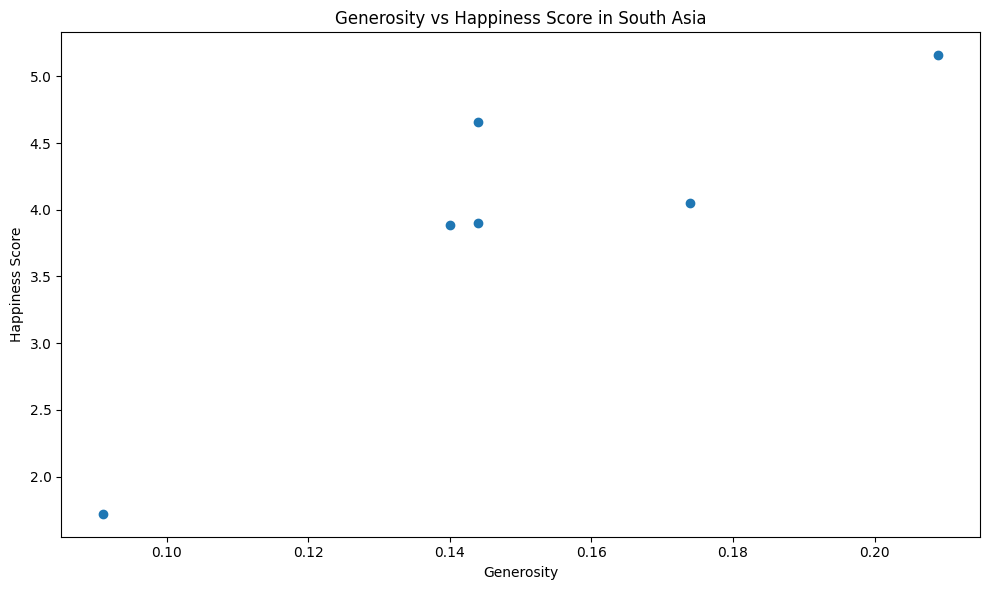

In [ ]:
# Task4 - Exploring Trends Across Metrics:

# Correlation Analysis
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']
for metric in metrics_to_correlate:
    correlation = south_asia_df['score'].corr(south_asia_df[metric])
    print(f"\nCorrelation between Score and {metric}: {correlation:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(south_asia_df[metric], south_asia_df['score'])
    plt.title(f'{metric} vs Happiness Score in South Asia')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.tight_layout()
    plt.show()
    plt.close()

Ranking of South Asian Countries by GDP-Score Gap:
    Country name  GDP-Score Gap  Gap Rank Ascending  Gap Rank Descending
92         Nepal         -4.193                 1.0                  6.0
107     Pakistan         -3.588                 2.0                  5.0
125        India         -2.888                 3.0                  4.0
127    Sri Lanka         -2.537                 5.0                  2.0
128   Bangladesh         -2.764                 4.0                  3.0
142  Afghanistan         -1.093                 6.0                  1.0


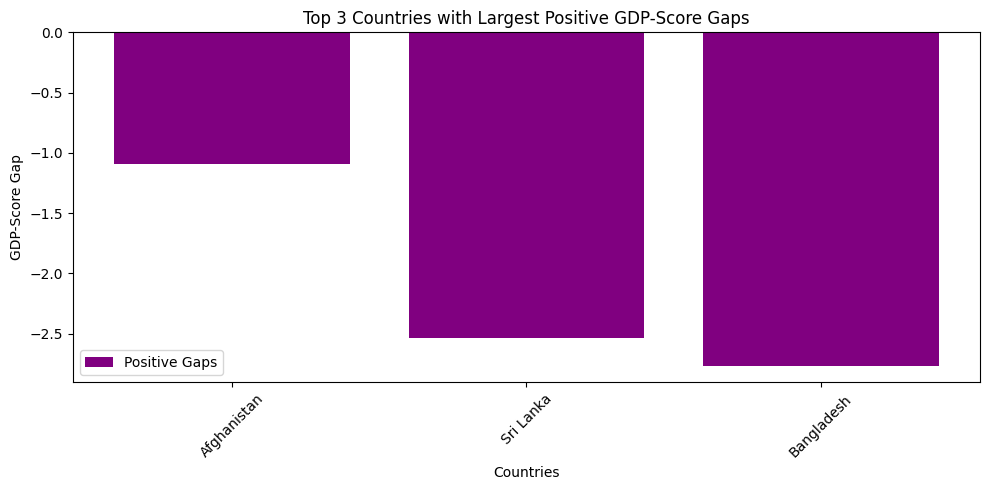

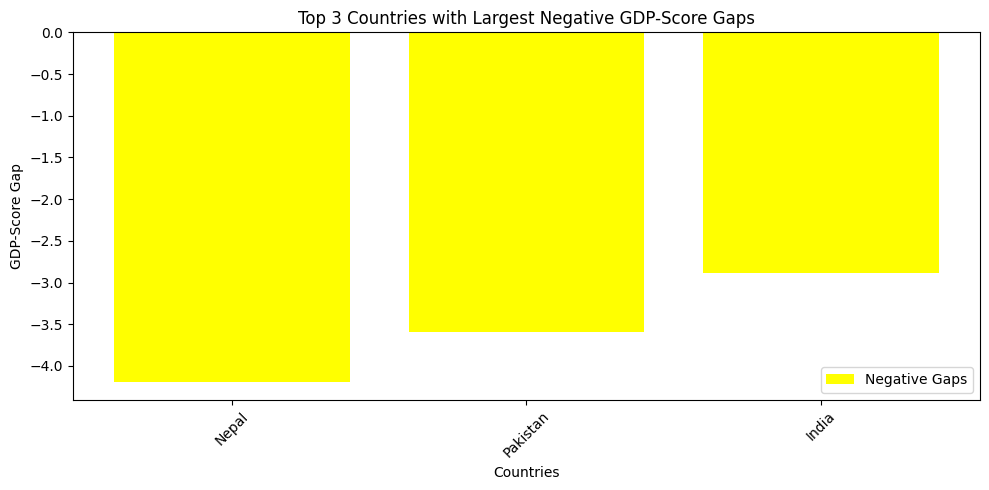

In [ ]:
#Task5 - Gap Analysis:

# Calculate the gap between Log GDP per capita and Happiness Score for each country
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by GDP-Score Gap in both ascending and descending order
south_asia_df['Gap Rank Ascending'] = south_asia_df['GDP-Score Gap'].rank(ascending=True)
south_asia_df['Gap Rank Descending'] = south_asia_df['GDP-Score Gap'].rank(ascending=False)

# Display the ranking of countries by GDP-Score Gap
print("Ranking of South Asian Countries by GDP-Score Gap:")
print(south_asia_df[['Country name', 'GDP-Score Gap', 'Gap Rank Ascending', 'Gap Rank Descending']])

# Identify the top 3 countries with the largest positive and negative GDP-Score Gaps
top_positive_gaps = south_asia_df.nlargest(3, 'GDP-Score Gap')
top_negative_gaps = south_asia_df.nsmallest(3, 'GDP-Score Gap')

# Visualize the top 3 countries with the largest positive GDP-Score Gaps
plt.figure(figsize=(10, 5))
plt.bar(top_positive_gaps['Country name'], top_positive_gaps['GDP-Score Gap'], color='purple', label='Positive Gaps')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')
plt.xlabel('Countries')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualize the top 3 countries with the largest negative GDP-Score Gaps
plt.figure(figsize=(10, 5))
plt.bar(top_negative_gaps['Country name'], top_negative_gaps['GDP-Score Gap'], color='yellow', label='Negative Gaps')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps')
plt.xlabel('Countries')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Problem3 - Comparative Analysis:
#Task1 - Setup Task - Preparing the Middle Eastern Dataset:

# Define a list of Middle Eastern countries to filter the dataset
middle_eastern_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

# Create a new DataFrame containing only the data for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)].copy()


In [ ]:
# Descriptive Statistics:

# Calculate the mean and standard deviation of happiness scores for South Asia
mean_south_asia = south_asia_df['score'].mean()
std_south_asia = south_asia_df['score'].std()

# Calculate the mean and standard deviation of happiness scores for the Middle East
mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()

# Display the calculated statistics for both regions
print(f"South Asia: Average Happiness Score = {mean_south_asia:.2f}, Standard Deviation = {std_south_asia:.2f}")
print(f"Middle East: Average Happiness Score = {mean_middle_east:.2f}, Standard Deviation = {std_middle_east:.2f}")

# Identify which region has the higher average happiness score
higher_region = 'South Asia' if mean_south_asia > mean_middle_east else 'Middle East'
print(f"Higher Average Happiness Score Region: {higher_region}")


South Asia: Average Happiness Score = 3.90, Standard Deviation = 1.18
Middle East: Average Happiness Score = 5.41, Standard Deviation = 1.57
Higher Average Happiness Score Region: Middle East


Top 3 Happiest Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 Least Happy Countries in South Asia:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Happiest Countries in the Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Least Happy Countries in the Middle East:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


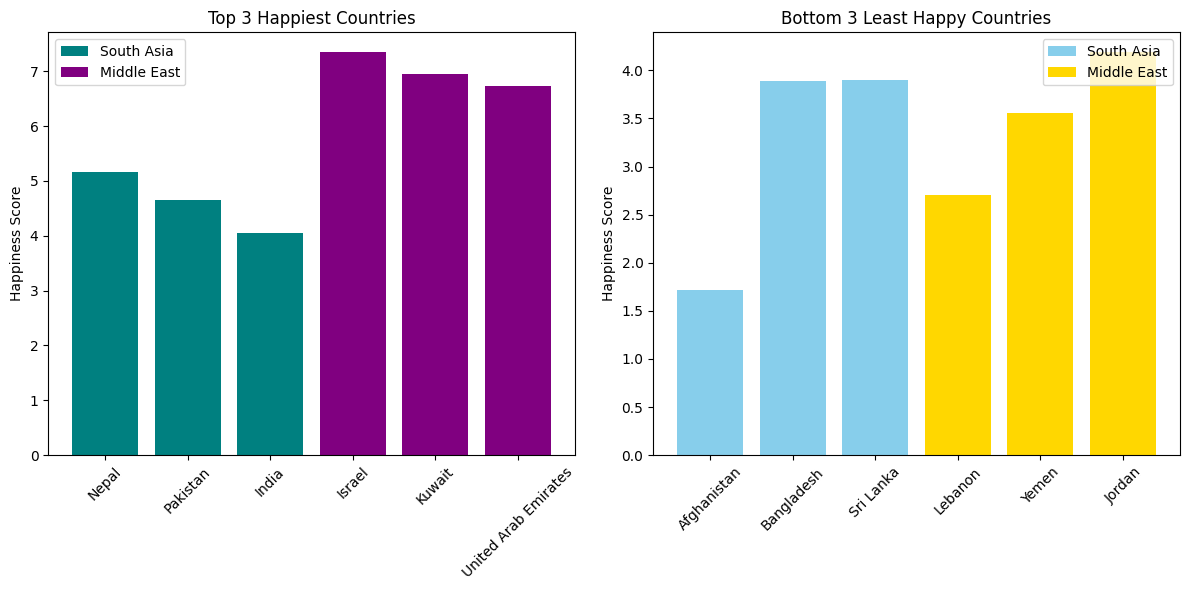

In [ ]:
# Top and Bottom Performers:

# Get the top 3 and bottom 3 countries by happiness score for South Asia and the Middle East
top_south_asia = south_asia_df.nlargest(3, 'score')
bottom_south_asia = south_asia_df.nsmallest(3, 'score')

top_middle_east = middle_east_df.nlargest(3, 'score')
bottom_middle_east = middle_east_df.nsmallest(3, 'score')

# Display the results
print("Top 3 Happiest Countries in South Asia:")
print(top_south_asia[['Country name', 'score']])
print("\nBottom 3 Least Happy Countries in South Asia:")
print(bottom_south_asia[['Country name', 'score']])

print("\nTop 3 Happiest Countries in the Middle East:")
print(top_middle_east[['Country name', 'score']])
print("\nBottom 3 Least Happy Countries in the Middle East:")
print(bottom_middle_east[['Country name', 'score']])

# Plot bar charts comparing top and bottom performers
plt.figure(figsize=(12, 6))

# Top performers
plt.subplot(1, 2, 1)
plt.bar(top_south_asia['Country name'], top_south_asia['score'], color='teal', label='South Asia')
plt.bar(top_middle_east['Country name'], top_middle_east['score'], color='purple', label='Middle East')
plt.title('Top 3 Happiest Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

# Bottom performers
plt.subplot(1, 2, 2)
plt.bar(bottom_south_asia['Country name'], bottom_south_asia['score'], color='skyblue', label='South Asia')
plt.bar(bottom_middle_east['Country name'], bottom_middle_east['score'], color='gold', label='Middle East')
plt.title('Bottom 3 Least Happy Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


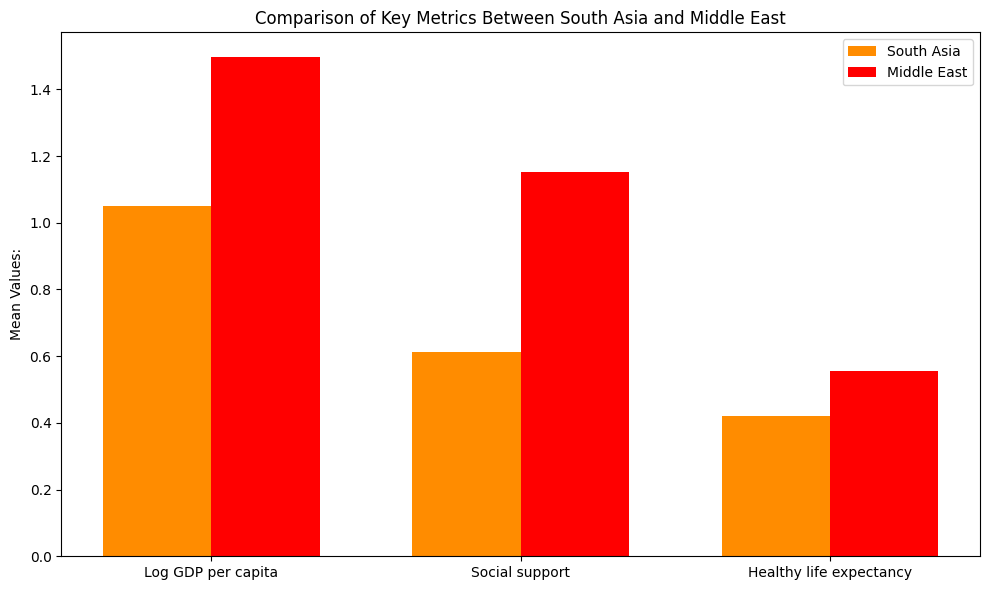

In [ ]:
# Metric Comparisons:
# Comparing key metrics between regions using grouped bar charts
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = [south_asia_df[metric].mean() for metric in metrics]
middle_east_means = [middle_east_df[metric].mean() for metric in metrics]

x = np.arange(len(metrics))
width = 0.35

# Create a grouped bar chart to compare the metrics between South Asia and the Middle East
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, south_asia_means, width, label='South Asia', color='darkorange')
bars2 = ax.bar(x + width/2, middle_east_means, width, label='Middle East', color='red')

# Set chart labels and title
ax.set_ylabel('Mean Values:')
ax.set_title('Comparison of Key Metrics Between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Happiness Disparity:
# Compute the range (max - min) and coefficient of variation (CV) for happiness scores in both regions
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = std_south_asia / mean_south_asia * 100
middle_east_cv = std_middle_east / mean_middle_east * 100

# Display the results with updated statements
print(f"South Asia: Range = {south_asia_range:.2f}, Coefficient of Variation (CV) = {south_asia_cv:.2f}%")
print(f"Middle East: Range = {middle_east_range:.2f}, Coefficient of Variation (CV) = {middle_east_cv:.2f}%")

# Determine which region has greater variability
greater_variability_region = 'South Asia' if south_asia_cv > middle_east_cv else 'Middle East'
print(f"Region with higher variability in happiness scores: {greater_variability_region}")


South Asia: Range = 3.44, Coefficient of Variation (CV) = 30.21%
Middle East: Range = 4.63, Coefficient of Variation (CV) = 28.94%
Region with higher variability in happiness scores: South Asia



South Asia - Correlation with Freedom to Make Life Choices: 0.80
South Asia - Correlation with Generosity: 0.87


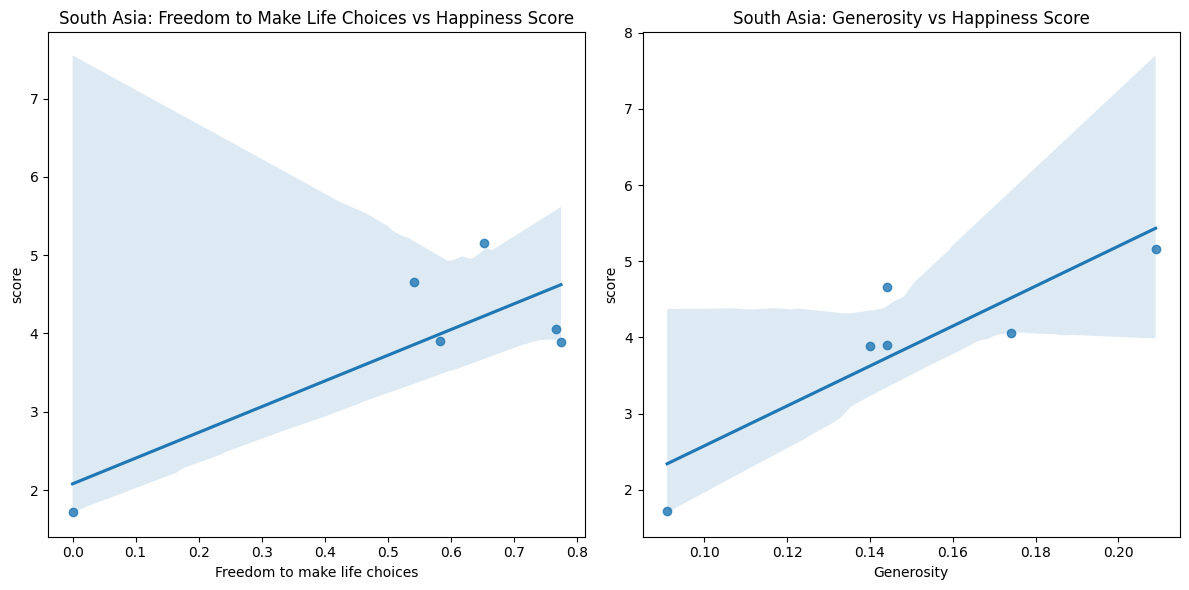


Middle East - Correlation with Freedom to Make Life Choices: 0.86
Middle East - Correlation with Generosity: 0.63


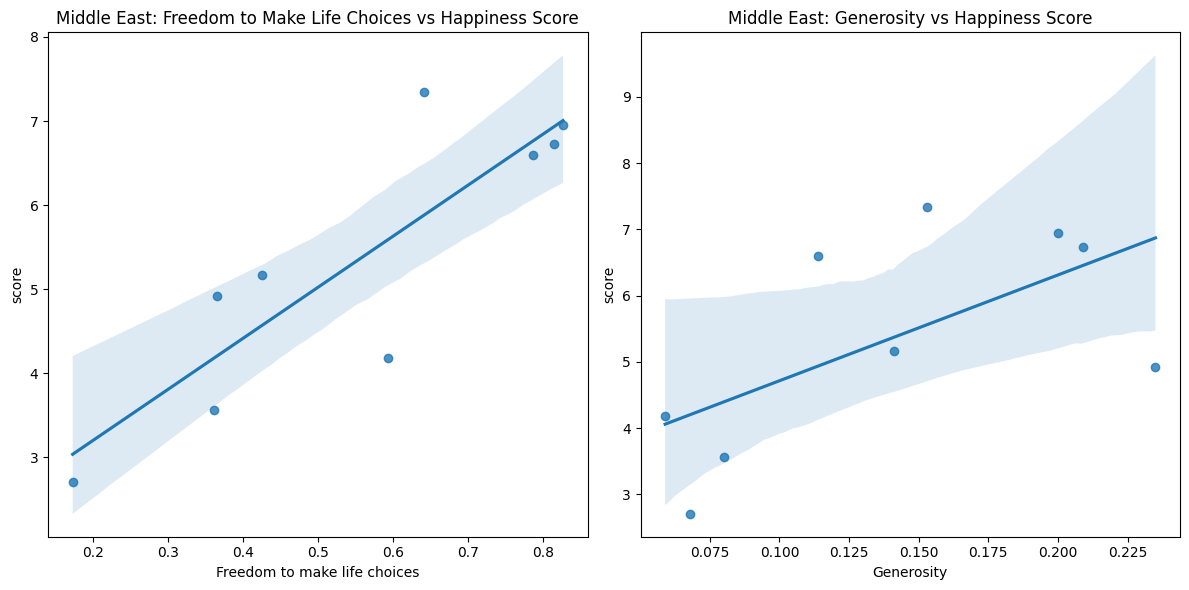

In [ ]:
#Correlation Analysis:
# Analyzing the correlation of Happiness Score with other metrics (Freedom to make life choices and Generosity) for each region
for region_name, region_data in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    correlation_freedom = region_data['Freedom to make life choices'].corr(region_data['score'])
    correlation_generosity = region_data['Generosity'].corr(region_data['score'])

    print(f"\n{region_name} - Correlation with Freedom to Make Life Choices: {correlation_freedom:.2f}")
    print(f"{region_name} - Correlation with Generosity: {correlation_generosity:.2f}")

    # Creating scatter plots for visualization
    plt.figure(figsize=(12, 6))

    # Scatter plot for Freedom to Make Life Choices vs Happiness Score
    plt.subplot(1, 2, 1)
    sns.regplot(x='Freedom to make life choices', y='score', data=region_data)
    plt.title(f'{region_name}: Freedom to Make Life Choices vs Happiness Score')

    # Scatter plot for Generosity vs Happiness Score
    plt.subplot(1, 2, 2)
    sns.regplot(x='Generosity', y='score', data=region_data)
    plt.title(f'{region_name}: Generosity vs Happiness Score')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


Outliers in South Asia based on Happiness Score:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Outliers in Middle East based on Happiness Score:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


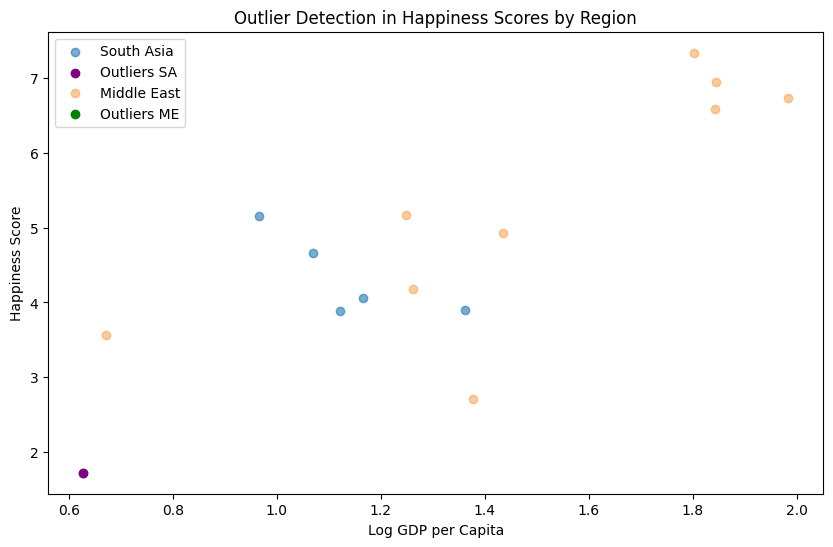

In [ ]:
#Outlier Detection:
# Identifying outlier countries based on Happiness Score and GDP per Capita for both regions
def identify_outliers(region_df):
    Q1_score = region_df['score'].quantile(0.25)
    Q3_score = region_df['score'].quantile(0.75)
    IQR_score = Q3_score - Q1_score

    outliers_score = region_df[
        (region_df['score'] < (Q1_score - 1.5 * IQR_score)) |
        (region_df['score'] > (Q3_score + 1.5 * IQR_score))
    ]

    return outliers_score

# Identifying outliers in South Asia and Middle East regions
south_asia_outliers = identify_outliers(south_asia_df)
middle_east_outliers = identify_outliers(middle_east_df)

# Displaying outliers in South Asia and Middle East
print("Outliers in South Asia based on Happiness Score:")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nOutliers in Middle East based on Happiness Score:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])

# Visualization of outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='South Asia', alpha=0.6)
plt.scatter(south_asia_outliers['Log GDP per capita'], south_asia_outliers['score'], color='purple', label='Outliers SA')

plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], label='Middle East', alpha=0.4)
plt.scatter(middle_east_outliers['Log GDP per capita'], middle_east_outliers['score'], color='green', label='Outliers ME')

plt.title('Outlier Detection in Happiness Scores by Region')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


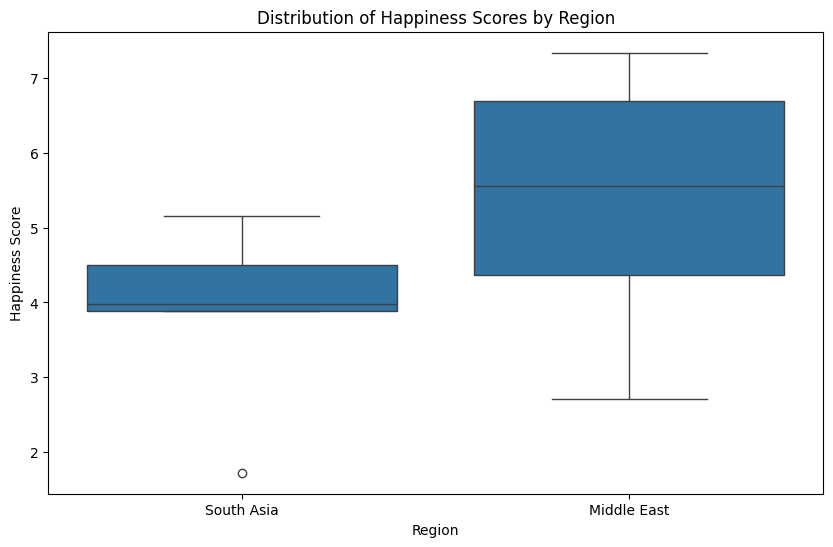

In [ ]:
# Visualization:

# Creating boxplots comparing the distribution of Score between South Asia and the Middle East
combined_df = pd.concat([
    south_asia_df.assign(Region='South Asia'),
    middle_east_df.assign(Region='Middle East')
])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Distribution of Happiness Scores by Region')
plt.ylabel('Happiness Score')
plt.show()